# Implemented PCA for DataSet 2 using Eigen value decomposition and also using PCA function imported from sklearn.decomposition package
Here in this code I have set the threshold value to 97% and observed the result, for 97% variance number of vectors to keep is 89. Plotted power law curve and also variance distribution vs PC.

In [1]:
import pandas as pd
import numpy as np
data1 = pd.read_csv("dist2_500_1.txt",sep = " ",header=None).dropna()
data2= pd.read_csv("dist2_500_2.txt",sep = " ",header=None).dropna()
df_list = [data1,data2]
dataSet2= pd.concat(df_list)
df = pd.DataFrame(columns=['PC1','Y-axis'])

# Standerdizing the whole dataSet
from sklearn.preprocessing import StandardScaler
XStandard = StandardScaler().fit_transform(dataSet2)

# Compute the mean of the data
mean_vec = np.mean(XStandard, axis=0)

# Compute the covariance matrix
covariance_mat = (XStandard - mean_vec).T.dot((XStandard - mean_vec)) / (XStandard.shape[0]-1)


# OR we can do this with one line of numpy:
covariance_mat = np.cov(XStandard.T)


# Compute the eigen values and vectors using numpy
eigen_vals, eigen_vecs = np.linalg.eig(covariance_mat)

# print('Eigenvectors \n%s' %eigen_vecs)
# print('\nEigenvalues \n%s' %eigen_vals)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


exp_var_percentage =97 # Threshold of 97% explained variance

tot = sum(eigen_vals)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("cumulative variance is",cum_var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp):
  if percentage > exp_var_percentage:
    num_vec_to_keep = index + 1
    break


num_features = XStandard.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
  proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Project the data 
pca_data = XStandard.dot(proj_mat)

cumulative variance is [ 49.11696257  50.02729596  50.92311826  51.78927547  52.63918936
  53.47594712  54.30272854  55.11156837  55.91444354  56.70731911
  57.49029829  58.26504741  59.02017696  59.76129099  60.49752054
  61.22864676  61.93289753  62.63167025  63.32711664  64.01577729
  64.7012865   65.37658099  66.0470252   66.71216202  67.36620418
  68.01423303  68.65428919  69.28073325  69.90265915  70.52076985
  71.13350138  71.7368635   72.33629588  72.92876859  73.50992065
  74.08603808  74.6588769   75.22842289  75.79167414  76.34413946
  76.89376618  77.43661775  77.97222784  78.50302847  79.02838452
  79.55189818  80.06921204  80.5810251   81.08446858  81.58408606
  82.0765763   82.5633652   83.04720002  83.52725831  84.00215241
  84.47146694  84.93369064  85.39076909  85.84241595  86.286392
  86.72821867  87.16660101  87.60183803  88.03295274  88.45384778
  88.86574789  89.27684086  89.68173957  90.07995545  90.47760901
  90.87315952  91.25841061  91.64165124  92.02083891  9

In [2]:
##number of vectors to Keep
num_vec_to_keep

89

[49.117   0.9103  0.8958  0.8662  0.8499  0.8368  0.8268  0.8088  0.8029
  0.7929  0.783   0.7747  0.7551  0.7411  0.7362  0.7311  0.7043  0.6988
  0.6954  0.6887  0.6855  0.6753  0.6704  0.6651  0.654   0.648   0.6401
  0.6264  0.6219  0.6181  0.6127  0.6034  0.5994  0.5925  0.5812  0.5761
  0.5728  0.5695  0.5633  0.5525  0.5496  0.5429  0.5356  0.5308  0.5254
  0.5235  0.5173  0.5118  0.5034  0.4996  0.4925  0.4868  0.4838  0.4801
  0.4749  0.4693  0.4622  0.4571  0.4516  0.444   0.4418  0.4384  0.4352
  0.4311  0.4209  0.4119  0.4111  0.4049  0.3982  0.3977  0.3956  0.3853
  0.3832  0.3792  0.3729  0.3695  0.3627  0.3535  0.3459  0.3453  0.3416
  0.3402  0.335   0.3256  0.3182  0.3116  0.3031  0.3014  0.298 ]


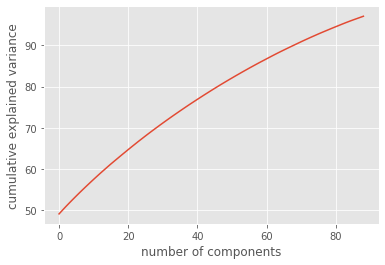

<Figure size 432x288 with 0 Axes>

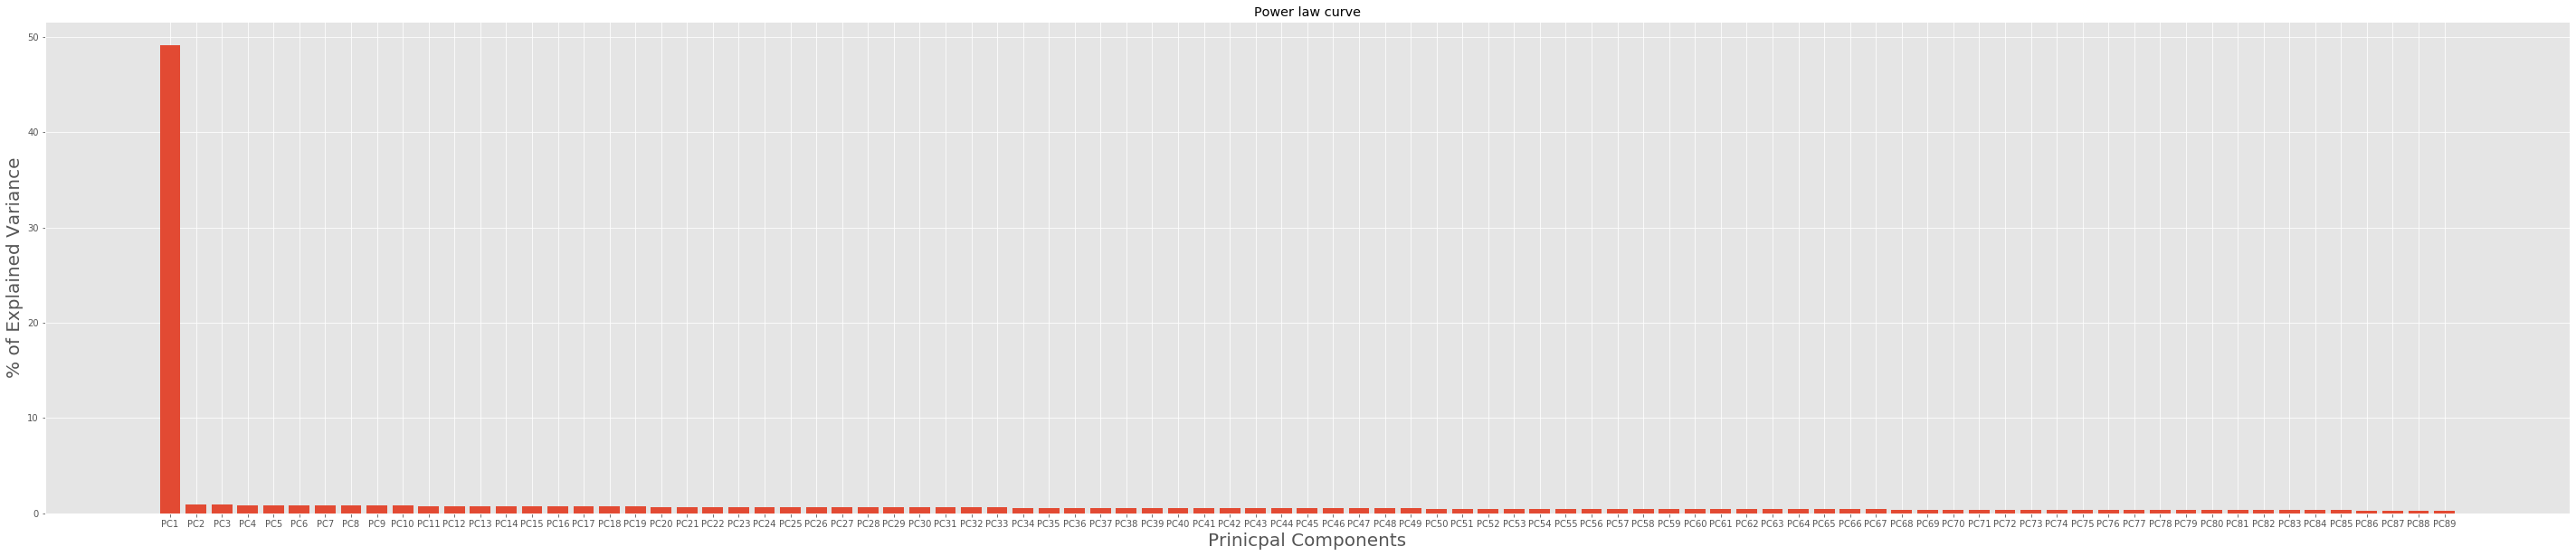

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

data1 = pd.read_csv("dist2_500_1.txt",sep = " ",header=None).dropna() #reading the data from dist2_500_1
data2= pd.read_csv("dist2_500_2.txt",sep = " ",header=None).dropna()  #reading the data from dist2_500_2
df_list = [data1,data2]  
dataSet2= pd.concat(df_list)

from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(dataSet2)
x_std

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(0.97)
pca.fit(x_std)

var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.plot(var1)

### plotting according to the Power law curve ###
print(np.round(pca.explained_variance_ratio_ * 100,4))

per_varaiance=np.round(pca.explained_variance_ratio_ * 100,4)

labels = ['PC' + str(x) for x in range(1,len(per_varaiance)+1)]
plt.figure('2')
plt.figure(figsize=(50,10))
plt.bar(x= range(1,len(per_varaiance)+1),height=per_varaiance,tick_label=labels)
plt.ylabel('% of Explained Variance',fontsize=20)
plt.xlabel('Prinicpal Components',fontsize=20)
plt.title('Power law curve')
plt.show()